# Introduction to Exploratory Data Analysis (EDA)

In this notebook, I perform Exploratory Data Analysis (EDA) on a dataset composed of Reddit posts from the `movies` and `books` subreddits. EDA is crucial to understand the underlying structure of the data, detect outliers, and identify significant patterns. This understanding will inform the feature engineering and modeling choices in later stages of the project.


## Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams

## Load Data

In [16]:
data = pd.read_csv('dataset/movies_books_dataset.csv')
data.drop(columns=['pos', 'text_and_pos'], inplace=True)
data.head(2)

,text,label
0,official discussion megathread monkey man firs...,0
1,hi im joshua caldwell directorproducer mending...,0


In [17]:
movies = data.loc[data['label'] == 0]
books = data.loc[data['label'] == 1]

# Data Cleaning and Preprocessing

Data cleaning is performed to remove any duplicates, as each post should be unique for analysis. This step ensures my EDA and subsequent modeling phases are based on genuine, non-repetitive data.


### Drop Duplicate Rows

In [18]:
movies_removed = movies.drop_duplicates(subset='text')
books_removed = books.drop_duplicates(subset='text')

print(f"Movies: {len(movies)} -> {len(movies_removed)}")
print(f"Books: {len(books)} -> {len(books_removed)}")

Movies: 1624 -> 1227
Books: 1323 -> 1179


## EDA

In [19]:
def remove_stopwords(s, stopwords):
    return ' '.join([word for word in word_tokenize(s) if word not in stopwords])

def generate_ngrams(s, n=2):
    return [' '.join(t) for t in list(ngrams(s.split(), n))]

In [20]:
book_stopwords = set(stopwords.words('english')).union(['read', 'reading', 'book', 'books', 'author', 'page', 'pages', 'feel', 'dont', 'like', 'im', 'one', 'really'])
movie_stopwords = set(stopwords.words('english')).union(['movie', 'movies', 'film', 'films', 'director', 'scene', 'feel', 'dont', 'trailer', 'like', 'im', 'one', 'really'])

movies_removed.loc[:, 'text'] = movies_removed['text'].apply(remove_stopwords, stopwords=movie_stopwords)
books_removed.loc[:, 'text'] = books_removed['text'].apply(remove_stopwords, stopwords=book_stopwords)

Here I remove some more words that will give away the subreddit, such as 'book' and 'movie'. I also remove common words that are not very informative, such as 'like' and 'just'.

# Word Cloud Generation

Word clouds are visual representations that give us immediate insight into the most frequent and significant words within my text data. By generating separate word clouds for `movies` and `books`, I can visually assess the most prominent terms in each subreddit and begin to understand the lexical differences betIen the two.


## Cloud of Words (single)

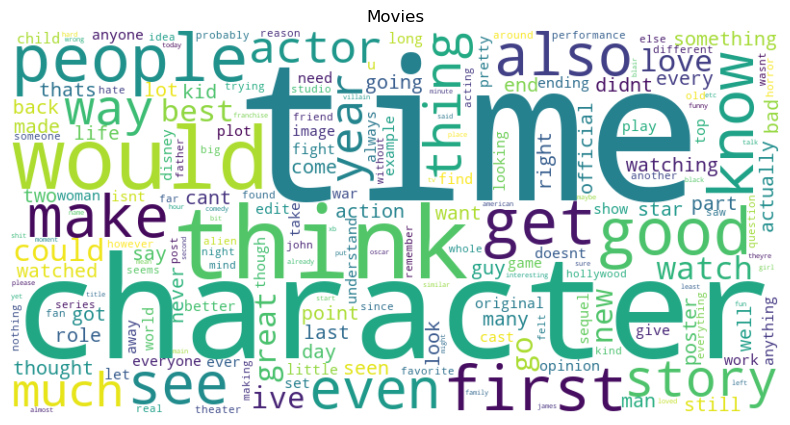

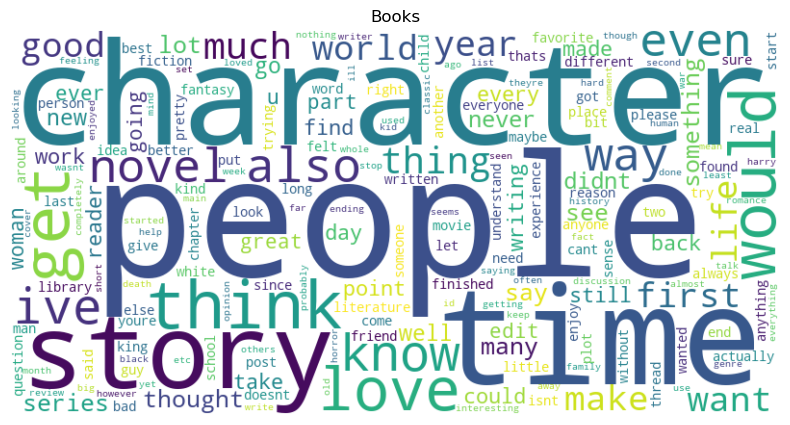

In [21]:
movie_word_count = pd.Series(' '.join(movies_removed['text']).split()).value_counts()
book_word_count = pd.Series(' '.join(books_removed['text']).split()).value_counts()

# Create WordCloud objects for movies and books
movie_wc_generator = WordCloud(width=800, height=400, max_words=200, background_color='white')
book_wc_generator = WordCloud(width=800, height=400, max_words=200, background_color='white')

# Generate the word clouds
movie_wc = movie_wc_generator.generate_from_frequencies(movie_word_count)
book_wc = book_wc_generator.generate_from_frequencies(book_word_count)

# Plot the word cloud for movies
plt.figure(figsize=(10, 5))
plt.imshow(movie_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Movies')
plt.show()

# Plot the word cloud for books
plt.figure(figsize=(10, 5))
plt.imshow(book_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Books')
plt.show()

# N-gram Analysis

N-grams are contiguous sequences of `n` items from a given sample of text. Analyzing the top n-grams gives us an understanding of common phrases within the `movies` and `books` subreddits. This analysis might reveal phrases that are particularly indicative of the content and style of discussion prevalent in each subreddit.


## Top 10 N-Grams

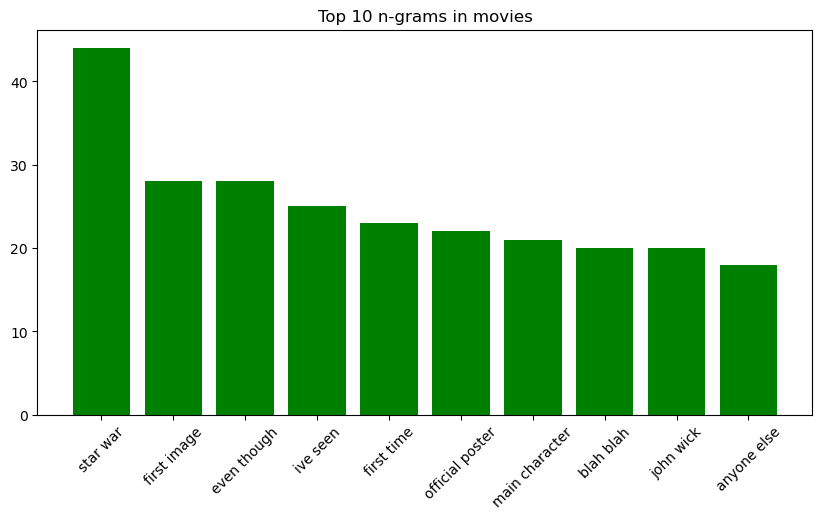

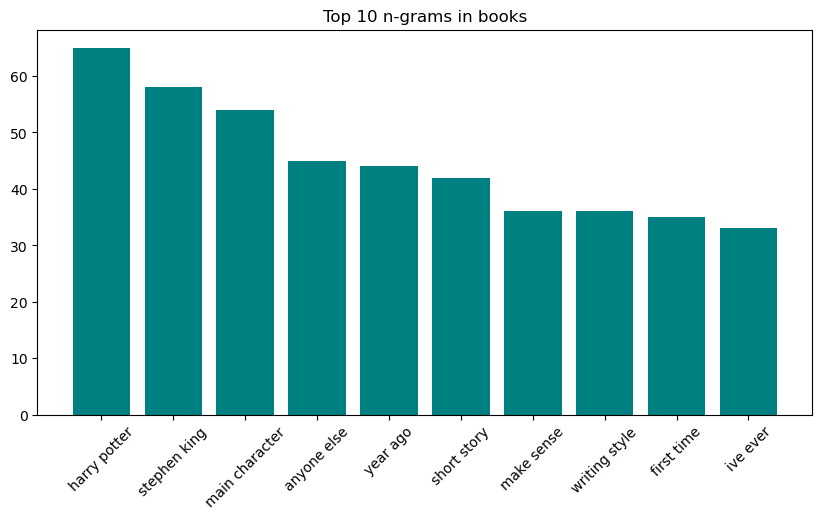

In [22]:
movies_ngrams = movies_removed['text'].apply(generate_ngrams)
books_ngrams = books_removed['text'].apply(generate_ngrams)

# Count the frequency of each n-gram
movie_ngram_count = pd.Series([ngram for sublist in movies_ngrams for ngram in sublist]).value_counts()
book_ngram_count = pd.Series([ngram for sublist in books_ngrams for ngram in sublist]).value_counts()

# Plot the top 10 n-grams for movies
plt.figure(figsize=(10, 5))
plt.bar(movie_ngram_count.index[:10], movie_ngram_count.values[:10], color='green')
plt.xticks(rotation=45)
plt.title('Top 10 n-grams in movies')
plt.show()

# Plot the top 10 n-grams for books
plt.figure(figsize=(10, 5))
plt.bar(book_ngram_count.index[:10], book_ngram_count.values[:10], color='teal')
plt.xticks(rotation=45)
plt.title('Top 10 n-grams in books')
plt.show()

# Sentiment Analysis

Sentiment analysis quantifies the emotional content of text, which could be predictive of the subreddit category. Here, I compute sentiment scores for each post and visualize the distribution of these scores. This step helps us understand the emotional tone prevalent in each subreddit's posts and could be a useful feature in my classification model.


## Sentiment Distribution

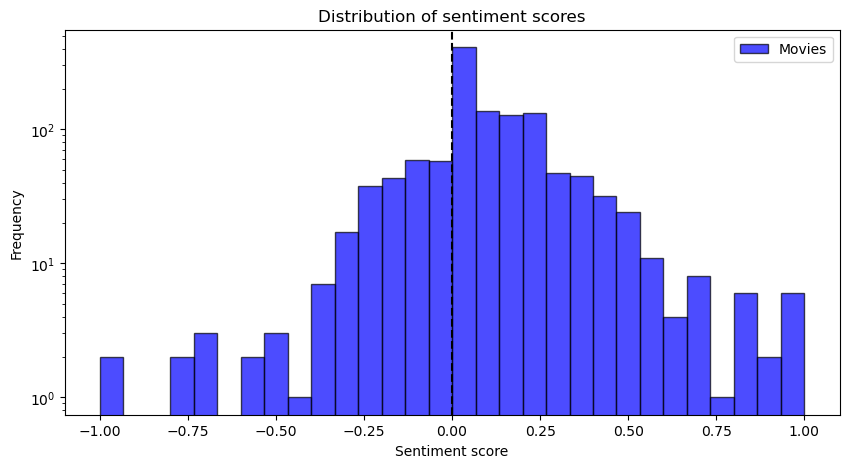

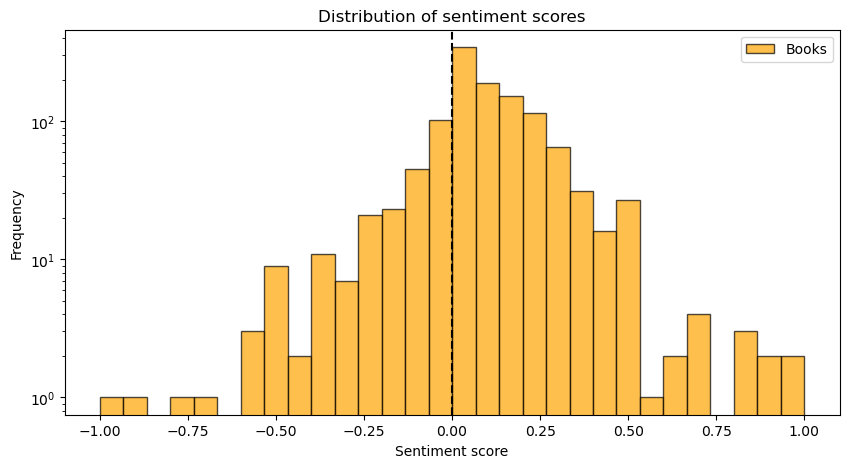

In [23]:
movies_removed = movies_removed.copy()
books_removed = books_removed.copy()

movies_removed.loc[:, 'sentiment'] = movies_removed['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
books_removed.loc[:, 'sentiment'] = books_removed['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the distribution of sentiment scores for movies
plt.figure(figsize=(10, 5))
plt.hist(movies_removed['sentiment'], bins=30, alpha=0.7, color='blue', label='Movies', edgecolor='black')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Sentiment score')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of sentiment scores')
plt.legend()
plt.show()

# Plot the distribution of sentiment scores for books
plt.figure(figsize=(10, 5))
plt.hist(books_removed['sentiment'], bins=30, alpha=0.7, color='orange', label='Books', edgecolor='black')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Sentiment score')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of sentiment scores')
plt.legend()
plt.show()


In [24]:
movies_removed = movies_removed[['text', 'sentiment', 'label']]
books_removed = books_removed[['text', 'sentiment', 'label']]
data = pd.concat([movies_removed, books_removed], ignore_index=True)
%store data

Stored 'data' (DataFrame)


# Conclusion of EDA

my exploratory data analysis has given us valuable insights into the textual and emotional characteristics of the posts from the `movies` and `books` subreddits. With these insights, I are better positioned to engineer relevant features and choose appropriate models for my classification task. The EDA outcomes will guide the next steps in my machine learning pipeline, leading to more informed and effective model training.
